### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')
pd.set_option('future.no_silent_downcasting', True)

In [7]:
print("Check top 5 rows in the dataset:")
data.head()

Check top 5 rows in the dataset:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [9]:
#Check for numerical and categorical data
print("------------------------------------------------------------------------------------------------------")
print("List of columns and object type in the dataset:")
data.info()
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
List of columns and object type in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-nul

In [10]:
#Change data type for categorical fieds that should be numerical
print("------------------------------------------------------------------------------------------------------")
print("Detected non-numerical values in nummerical category")
print(data['age'].unique())
print("------------------------------------------------------------------------------------------------------")
print("Replacing non-numerical values with numerical values")
data['age'] = data['age'].replace({
    'below21': 20,
    '50plus': 60,
})
data['age'] = data['age'].astype(int)
print(data['age'].unique())
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Detected non-numerical values in nummerical category
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
------------------------------------------------------------------------------------------------------
Replacing non-numerical values with numerical values
[21 46 26 31 41 60 36 20]
------------------------------------------------------------------------------------------------------


In [11]:
print("------------------------------------------------------------------------------------------------------")
print("Number of rows and columns in the dataset:")
print(data.shape)
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Number of rows and columns in the dataset:
(12684, 26)
------------------------------------------------------------------------------------------------------


In [12]:
#Checking for missing data and apply some data processing(to use some more pandas functions) for a nicer formating and better overall readability of data 
print("------------------------------------------------------------------------------------------------------")
print("Number of missing values per category in the dataset:")
print("------------------------------------------------------------------------------------------------------")
missing_data_num = data.isna().sum()
missing_data_per = (data.isna().mean()*100).round(2).astype(str) + '%'
missing_data = pd.concat([missing_data_num, missing_data_per], axis = 1, ignore_index=True)
columns = missing_data.columns.tolist()
columns[0] = 'Missing_Values'
columns[1] = '%_Missing_Values'
missing_data.columns = columns
missing_data = missing_data[missing_data['Missing_Values'] != 0]
print (missing_data)
print("------------------------------------------------------------------------------------------------------")
print("'car' category is not usable since over 99% or data is missing, therefore is a serios candidate to drop")
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Number of missing values per category in the dataset:
------------------------------------------------------------------------------------------------------
                      Missing_Values %_Missing_Values
car                            12576           99.15%
Bar                              107            0.84%
CoffeeHouse                      217            1.71%
CarryAway                        151            1.19%
RestaurantLessThan20             130            1.02%
Restaurant20To50                 189            1.49%
------------------------------------------------------------------------------------------------------
'car' category is not usable since over 99% or data is missing, therefore is a serios candidate to drop
------------------------------------------------------------------------------------------------------


In [13]:
#Checking if the nature of the values for the most incomplete category "car" have any relevance and decide the best next action
print("------------------------------------------------------------------------------------------------------")
print("Nature of unique values for the category that has the most missing values:")
print("------------------------------------------------------------------------------------------------------")
print(data[['car']].value_counts())
print("------------------------------------------------------------------------------------------------------")
print("Based on the nature of the values I conclude that 'car' category is not relevant for the analysis and can be discarded al together")
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Nature of unique values for the category that has the most missing values:
------------------------------------------------------------------------------------------------------
car                                     
Mazda5                                      22
Scooter and motorcycle                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------
Based on the nature of the values I conclude that 'car' category is not relevant for the analysis and can be discarded al together
------------------------------------------------------------------------------------------------------


In [14]:
#Checking the nature of the other categories with missing data and decide the next best action
print("------------------------------------------------------------------------------------------------------")
print("Count of values by category for the catagories that have some missing data will allow me to assess further the relevance of the information")
print("------------------------------------------------------------------------------------------------------")
print(data[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].apply(data.value_counts))
print("------------------------------------------------------------------------------------------------------")
print("Since all categories have a good distribution, I conclude that is safe to remove the relatively small number of rows with null values")
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Count of values by category for the catagories that have some missing data will allow me to assess further the relevance of the information
------------------------------------------------------------------------------------------------------
        Bar  CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50
1~3    2473         3225       4672                  5376              3290
4~8    1076         1784       4258                  3580               728
gt8     349         1111       1594                  1285               264
less1  3482         3385       1856                  2093              6077
never  5197         2962        153                   220              2136
------------------------------------------------------------------------------------------------------
Since all categories have a good distribution, I conclude that is safe to remove the relatively

#### 3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
#Cleaning up data frame - Remove "car" column
data_dc = data.drop('car', axis=1)
# Checking that one column was removed
print("------------------------------------------------------------------------------------------------------")
print("Number of columns after column removal is now:")
data_dc.shape
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Number of columns after column removal is now:
------------------------------------------------------------------------------------------------------


In [17]:
#Cleaning up data frame - Remove all other rows that contains null values (is a very small % (under 2% ) of the total values)
print("------------------------------------------------------------------------------------------------------")
data_clean = data_dc.dropna().reset_index(drop=True)
print("Number of rows after rows removal is now:")
print(data_clean.shape)
print("------------------------------------------------------------------------------------------------------")
print("Total number of removed rows is:")
print(data.count(numeric_only = False).max() - data_clean.count(numeric_only = False).max())
print("Total number of removed rows as % of the total rows is:")
ratio_p = round((((data.count(numeric_only = False).max() - data_clean.count(numeric_only = False).max())/data.count(numeric_only = False).max())*100), 2)
print(str(ratio_p) + '%')
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Number of rows after rows removal is now:
(12079, 25)
------------------------------------------------------------------------------------------------------
Total number of removed rows is:
605
Total number of removed rows as % of the total rows is:
4.77%
------------------------------------------------------------------------------------------------------


#### 4. What proportion of the total observations chose to accept the coupon?



In [19]:
#Calculating the total number of persons that accepted the coupon
print("------------------------------------------------------------------------------------------------------")
print("Total number of persons that accepted the cupon is:")
print(data_clean['Y'].sum().astype(str) + " persons")
print("% of persons that accepted the cupon is:")
print(((data_clean['Y'].mean())*100).round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Total number of persons that accepted the cupon is:
6877 persons
% of persons that accepted the cupon is:
56.93%
------------------------------------------------------------------------------------------------------


#### 5. Use a bar plot to visualize the `coupon` column.

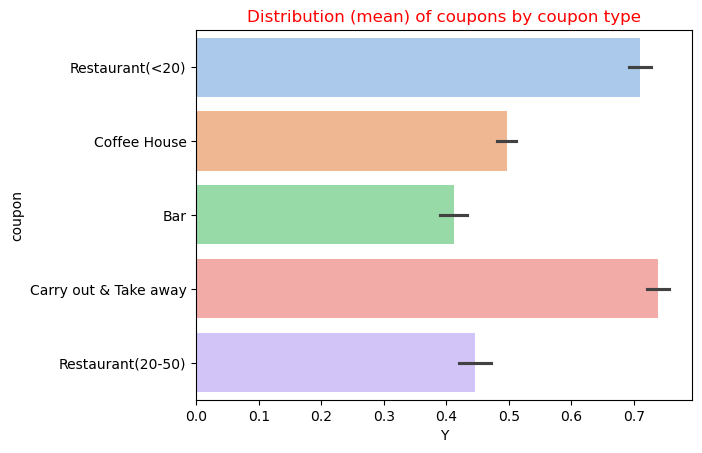

In [21]:
# Plotting distribution (mean) of coupons by type of coupon
plt.title("Distribution (mean) of coupons by coupon type", color = 'Red');
sns.set_palette('pastel')
plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
});

sns.barplot(data_clean, x = 'Y', y ='coupon', palette = 'pastel', hue = 'coupon');

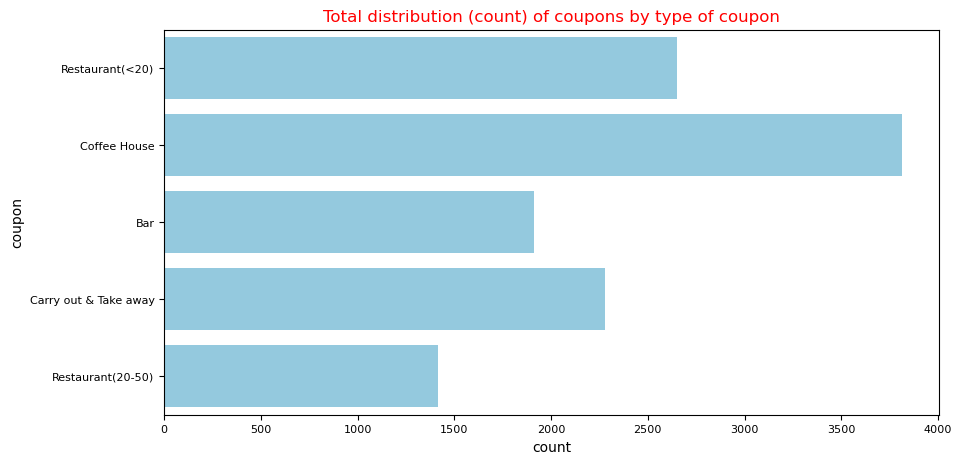

In [22]:
#Plotting Total distribution (count) of coupons by type of coupon
plt.title("Total distribution (count) of coupons by type of coupon", color = 'Red');
sns.set_palette('pastel')
plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
});
sns.countplot(data_clean, y ='coupon', color='skyblue');

#### 6. Use a histogram to visualize the temperature column.

<Axes: title={'center': 'Histogram for distribution of temperature'}, xlabel='temperature', ylabel='Count'>

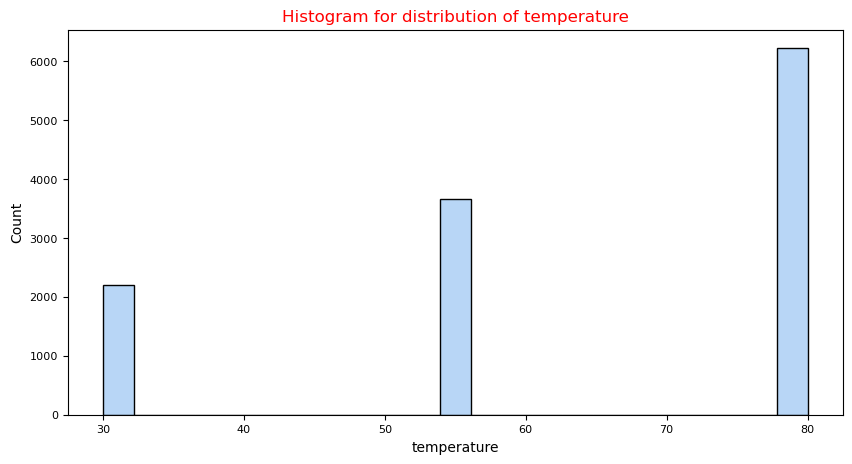

In [24]:
#Plotting temperature histogram
plt.title("Histogram for distribution of temperature", color = 'Red');
plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
});
sns.histplot(data_clean, x ="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

##### 1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
#Creating new dataframe
df_coupons = data_clean.query("coupon == 'Bar'")
df_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


##### 2. What proportion of bar coupons were accepted?


------------------------------------------------------------------------------------------------------
Total number of persons that accepted the coupons:
788 persons
Percentage persons that accepted the coupons:
41.19%
------------------------------------------------------------------------------------------------------


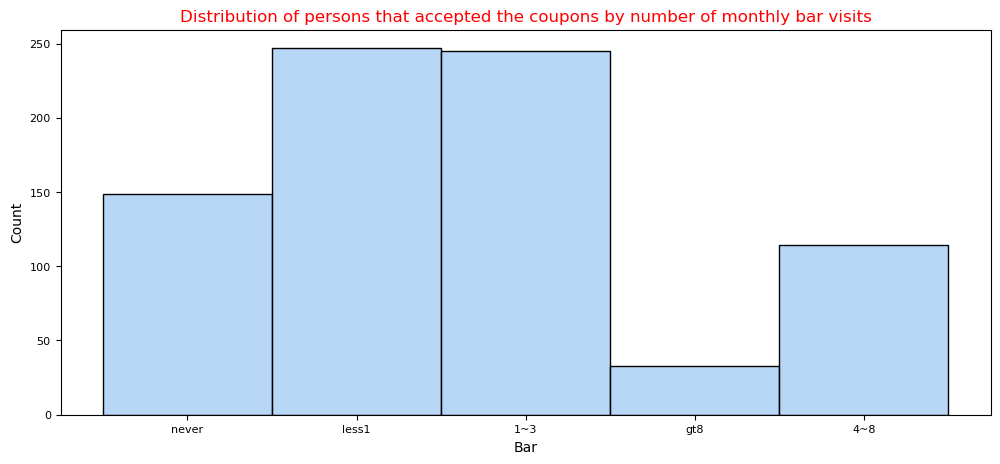

In [130]:
#Calculating the total number of bar cupons that were accepted
df_coupons_bar_accepted = df_coupons.query("Y == 1")['Y'].sum()
df_coupons_bar_accepted_ratio = ((df_coupons_bar_accepted / df_coupons.count()['Y'])*100)
print("------------------------------------------------------------------------------------------------------")
print("Total number of persons that accepted the coupons:")
print(df_coupons_bar_accepted.astype(str) + ' persons')
print("Percentage persons that accepted the coupons:")
print(df_coupons_bar_accepted_ratio.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")
plt.title("Distribution of persons that accepted the coupons by number of monthly bar visits", color = 'Red');
sns.set_palette('pastel')
plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
});
sns.histplot(df_coupons.query("Y == 1"), x = 'Bar');

##### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


------------------------------------------------------------------------------------------------------
Total number of drivers that visit the bars less or up to 3 times a month and accepted the coupons:
641
Total number of drivers that visit the bars less or up to 3 times a month and rejected the coupons:
1079
Percentage of drivers that visit the bars less or up to 3 times a month and accepted the coupons:
37.27%
------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
Total number of drivers that visit the bars more than 3 times a month and accepted the coupons:
147
Total number of drivers that visit the bars more than 3 times a month and rejected the coupons:
46
Percentage of drivers that visit the bars more than 3 times a month and accepted the coupons:
76.17%
----------------------------------------------------------------------------

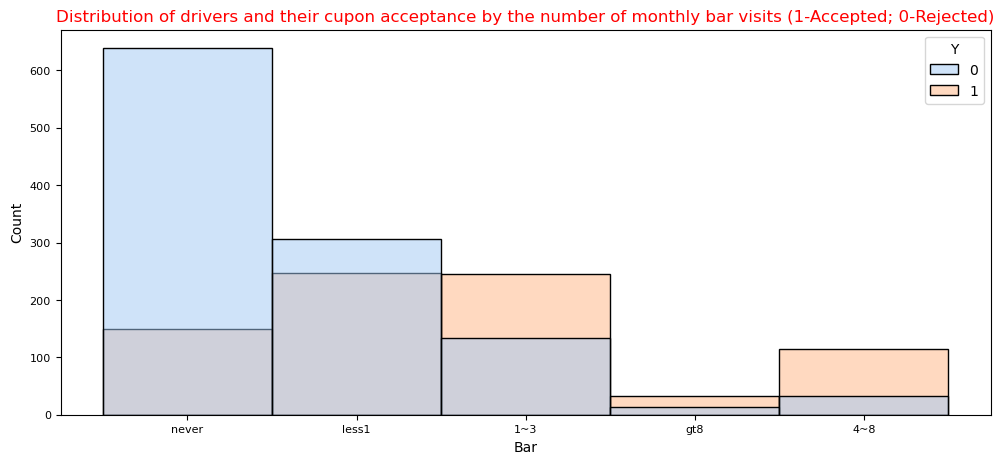

In [179]:
#Calculating acceptance rate for those who went to a bar 3 or fewer times a month
df_coupons_bar_upto_3times_a = df_coupons[(df_coupons['Bar'].isin(['1~3', 'less1', 'never']) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_upto_3times_r = df_coupons[(df_coupons['Bar'].isin(['1~3', 'less1', 'never']) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_3times_ratio_a = df_coupons_bar_upto_3times_a / (df_coupons_bar_upto_3times_a + df_coupons_bar_upto_3times_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers that visit the bars less or up to 3 times a month and accepted the coupons:")
print(df_coupons_bar_upto_3times_a)
print("Total number of drivers that visit the bars less or up to 3 times a month and rejected the coupons:")
print(df_coupons_bar_upto_3times_r)
print("Percentage of drivers that visit the bars less or up to 3 times a month and accepted the coupons:")
print(df_bar_3times_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")
print('')

#Calculating acceptance rate for those who went to a bar more than 3 times a month
df_coupons_bar_more_3times_a = df_coupons[(df_coupons['Bar'].isin(['4~8', 'gt8']) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_more_3times_r = df_coupons[(df_coupons['Bar'].isin(['4~8', 'gt8']) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_more_3times_ratio_a = df_coupons_bar_more_3times_a / (df_coupons_bar_more_3times_a + df_coupons_bar_more_3times_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers that visit the bars more than 3 times a month and accepted the coupons:")
print(df_coupons_bar_more_3times_a)
print("Total number of drivers that visit the bars more than 3 times a month and rejected the coupons:")
print(df_coupons_bar_more_3times_r)
print("Percentage of drivers that visit the bars more than 3 times a month and accepted the coupons:")
print(df_bar_more_3times_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

plt.title("Distribution of drivers and their cupon acceptance by the number of monthly bar visits (1-Accepted; 0-Rejected)", color = 'Red');
sns.set_palette('pastel')
plt.rcParams.update({
    'figure.figsize': (15, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
});
sns.histplot(data=df_coupons, x = 'Bar', hue = 'Y');

##### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


------------------------------------------------------------------------------------------------------
Total number of drives that are over 25 of age and visit the bars more than 1 time a month and accepted the coupons:
278
Total number of drivers that are over 25 of age and visit the bars more than 1 time a month and rejected the coupons:
125
Percentage of drivers that are over 25 of age and visit the bars more than 1 time a month and accepted the coupons:
68.98%
------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
Total number of drivers that visit the bars less than 1 time a month and accepted the coupons:
120
Total number of drivers that visit the bars less than 1 time a month and rejected the coupons:
189
Percentage of drivers that visit the bars less than 1 time a month and accepted the coupons:
38.83%
--------------------------

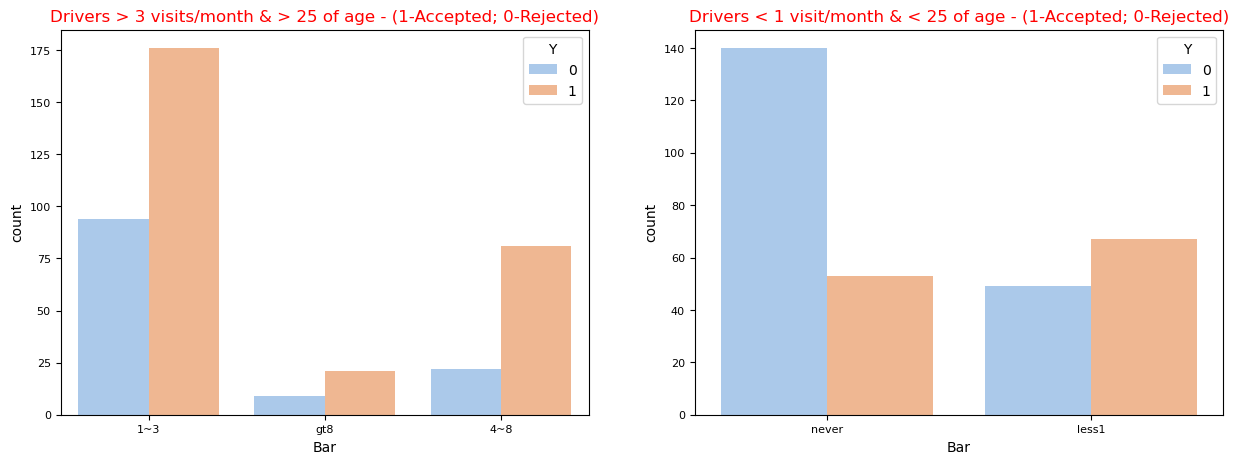

In [213]:
#Calculating acceptance rate between drivers who go to a bar more than once a month and are over the age of 25
df_coupons_bar_more_1time_more25_a = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['age'] > 25) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_more_1time_more25_r = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['age'] > 25) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_more_1time_more25_ratio_a = df_coupons_bar_more_1time_more25_a / (df_coupons_bar_more_1time_more25_a + df_coupons_bar_more_1time_more25_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drives that are over 25 of age and visit the bars more than 1 time a month and accepted the coupons:")
print(df_coupons_bar_more_1time_more25_a)
print("Total number of drivers that are over 25 of age and visit the bars more than 1 time a month and rejected the coupons:")
print(df_coupons_bar_more_1time_more25_r)
print("Percentage of drivers that are over 25 of age and visit the bars more than 1 time a month and accepted the coupons:")
print(df_bar_more_1time_more25_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")
print('')

#Calculating acceptance rate between drivers who go to a bar less than once a month and are below the age of 25
df_coupons_bar_less_1time_less25_a = df_coupons[(df_coupons['Bar'].isin(['less1', 'never']) & (df_coupons['age'] < 25) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_less_1time_less25_r = df_coupons[(df_coupons['Bar'].isin(['less1', 'never']) & (df_coupons['age'] < 25) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_less_1time_less25_ratio_a = df_coupons_bar_less_1time_less25_a / (df_coupons_bar_less_1time_less25_a + df_coupons_bar_less_1time_less25_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers that visit the bars less than 1 time a month and accepted the coupons:")
print(df_coupons_bar_less_1time_less25_a)
print("Total number of drivers that visit the bars less than 1 time a month and rejected the coupons:")
print(df_coupons_bar_less_1time_less25_r)
print("Percentage of drivers that visit the bars less than 1 time a month and accepted the coupons:")
print(df_bar_less_1time_less25_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

# First plot
plt.subplot(1, 2, 1)
sns.countplot(data=df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['age'] > 25))], x='Bar', hue = 'Y')
plt.title('Drivers > 3 visits/month & > 25 of age - (1-Accepted; 0-Rejected)', color = 'Red')

# Second plot
plt.subplot(1, 2, 2)
sns.countplot(data=df_coupons[(df_coupons['Bar'].isin(['less1', 'never']) & (df_coupons['age'] < 25))], x = 'Bar', hue = 'Y')
plt.title('Drivers < 1 visit/month & < 25 of age - (1-Accepted; 0-Rejected)', color = 'Red')

##### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [34]:
#Calculating acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
df_coupons_bar_more_1time_special_a = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & (~df_coupons['occupation'].isin(['Farming Fishing & Forestry'])) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_more_1time_special_r = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & (~df_coupons['occupation'].isin(['Farming Fishing & Forestry'])) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_more_1time_special_ratio_a = df_coupons_bar_more_1time_special_a / (df_coupons_bar_more_1time_special_a + df_coupons_bar_more_1time_special_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers who go to bars more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry and accepted the coupons:")
print(df_coupons_bar_more_1time_special_a)
print("Total number of drivers who go to bars more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry and rejected the coupons:")
print(df_coupons_bar_more_1time_special_r)
print("Percentage of drivers who go to bars more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry and accepted the coupons:")
print(df_bar_more_1time_special_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Total number of drivers who go to bars more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry and accepted the coupons:
376
Total number of drivers who go to bars more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry and rejected the coupons:
154
Percentage of drivers who go to bars more than once a month, had passengers that were not a kid, had occupations other than farming, fishing, or forestry and accepted the coupons:
70.94%
------------------------------------------------------------------------------------------------------


##### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [36]:
#Calculating acceptance rate between drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed
df_coupons_bar_more_1time_nw_a = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & (~df_coupons['maritalStatus'].isin(['Widowed'])) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_more_1time_nw_r = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & (~df_coupons['maritalStatus'].isin(['Widowed'])) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_more_1time_nw_ratio_a = df_coupons_bar_more_1time_nw_a / (df_coupons_bar_more_1time_nw_a + df_coupons_bar_more_1time_nw_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted the coupons:")
print(df_coupons_bar_more_1time_nw_a)
print("Total number of drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed and rejected the coupons:")
print(df_coupons_bar_more_1time_nw_r)
print("Percentage of drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted the coupons:")
print(df_bar_more_1time_nw_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Total number of drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted the coupons:
376
Total number of drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed and rejected the coupons:
154
Percentage of drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted the coupons:
70.94%
------------------------------------------------------------------------------------------------------


In [37]:
#Calculating acceptance rate between drivers that go to bars more than once a month and are under the age of 30
df_coupons_bar_more_1time_less30_a = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['age'] < 30) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_bar_more_1time_less30_r = df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['age'] < 30) & (df_coupons['Y'] == 0))]['Y'].count()
df_bar_more_1time_less30_ratio_a = df_coupons_bar_more_1time_less30_a / (df_coupons_bar_more_1time_less30_a + df_coupons_bar_more_1time_less30_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers that go to bars more than once a month and are under the age of 30 and accepted the coupons:")
print(df_coupons_bar_more_1time_less30_a)
print("Total number of drivers that that go to bars more than once a month and are under the age of 30 and rejected the coupons:")
print(df_coupons_bar_more_1time_less30_r)
print("Percentage of drivers that that go to bars more than once a month and are under the age of 30 and accepted the coupons:")
print(df_bar_more_1time_less30_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Total number of drivers that go to bars more than once a month and are under the age of 30 and accepted the coupons:
236
Total number of drivers that that go to bars more than once a month and are under the age of 30 and rejected the coupons:
92
Percentage of drivers that that go to bars more than once a month and are under the age of 30 and accepted the coupons:
71.95%
------------------------------------------------------------------------------------------------------


In [38]:
#Calculating acceptance rate between drivers that go to cheap restaurants more than 4 times a month and income is less than 50K
df_coupons_less50k_a = df_coupons[(df_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (df_coupons['income'].isin(['$12500 - $24999', 'Less than $12500', '$25000 - $37499', '$37500 - $49999'])) & (df_coupons['Y'] == 1))]['Y'].count()
df_coupons_less50k_r = df_coupons[(df_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (df_coupons['income'].isin(['$12500 - $24999', 'Less than $12500', '$25000 - $37499', '$37500 - $49999'])) & (df_coupons['Y'] == 0))]['Y'].count()
df_less50k_ratio_a = df_coupons_less50k_a / (df_coupons_less50k_a + df_coupons_less50k_r)*100
print("------------------------------------------------------------------------------------------------------")
print("Total number of drivers that go to cheap restaurants more than 4 times a month and income is less than 50K and accepted the coupons:")
print(df_coupons_less50k_a)
print("Total number of drivers that go to cheap restaurants more than 4 times a month and income is less than 50K and rejected the coupons:")
print(df_coupons_less50k_r)
print("Percentage of drivers that go to cheap restaurants more than 4 times a month and income is less than 50K and accepted the coupons:")
print(df_less50k_ratio_a.round(2).astype(str) + '%')
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
Total number of drivers that go to cheap restaurants more than 4 times a month and income is less than 50K and accepted the coupons:
152
Total number of drivers that go to cheap restaurants more than 4 times a month and income is less than 50K and rejected the coupons:
181
Percentage of drivers that go to cheap restaurants more than 4 times a month and income is less than 50K and accepted the coupons:
45.65%
------------------------------------------------------------------------------------------------------


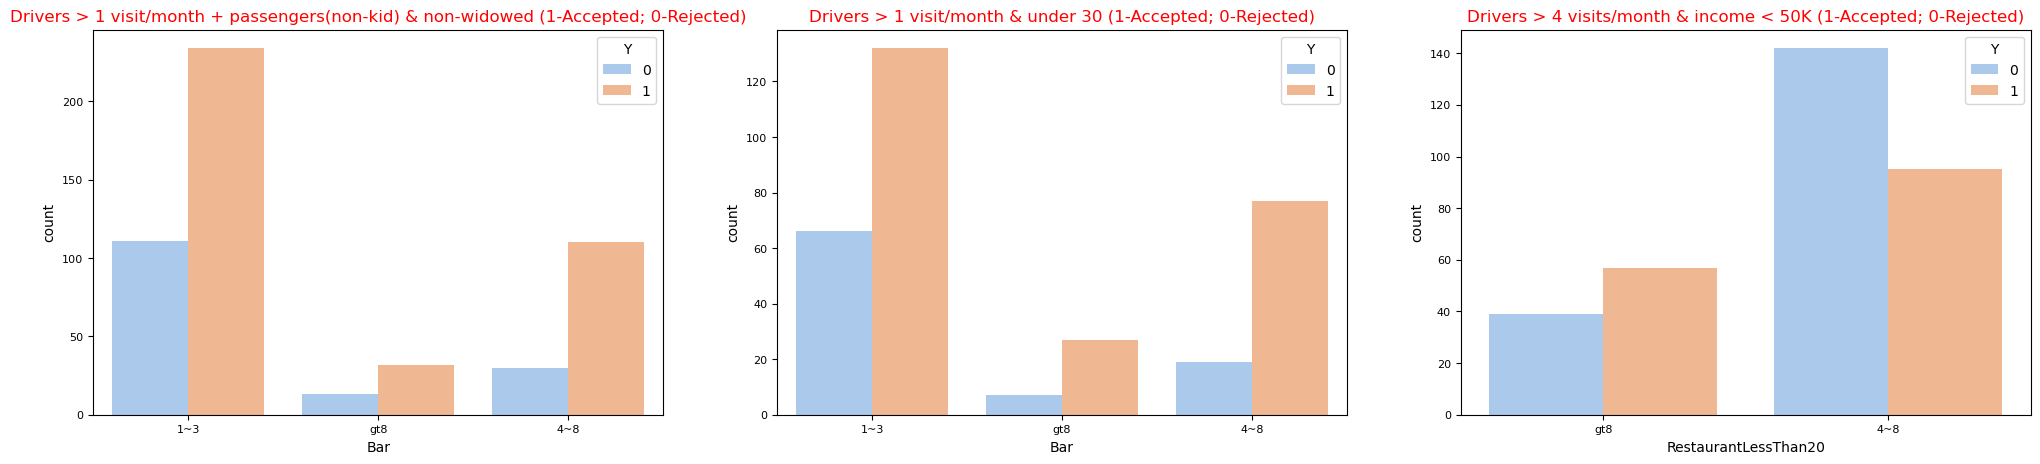

In [282]:
#ploting the charts of the three cases for comparison

plt.rcParams.update({
    'figure.figsize': (25, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
});

# First plot
plt.subplot(1, 3, 1)
sns.countplot(data=df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & (~df_coupons['maritalStatus'].isin(['Widowed'])))], x='Bar', hue = 'Y')
plt.title('Drivers > 1 visit/month + passengers(non-kid) & non-widowed (1-Accepted; 0-Rejected)', color = 'Red')

# Second plot
plt.subplot(1, 3, 2)
sns.countplot(data=df_coupons[(df_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_coupons['age'] < 30))], x = 'Bar', hue = 'Y')
plt.title('Drivers > 1 visit/month & under 30 (1-Accepted; 0-Rejected)', color = 'Red')

# Third plot
plt.subplot(1, 3, 3)
sns.countplot(data=df_coupons[(df_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (df_coupons['income'].isin(['$12500 - $24999', 'Less than $12500', '$25000 - $37499', '$37500 - $49999'])))], x = 'RestaurantLessThan20', hue = 'Y')
plt.title('Drivers > 4 visits/month & income < 50K (1-Accepted; 0-Rejected)', color = 'Red');

##### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [285]:
#I define a new dataframe and convert 'Bar', 'passanger' and 'maritalstatus' categories to numerical values for some further correlation analysis
dfc = data_clean

# mapped on pupose less than 1 visit per month to value '1' and more than 1 visit per month to value '2' to be able to conduct the analysis
dfc['Bar'] = dfc['Bar'].replace({'never': 1, 'less1': 1, '1~3': 2, '4~8': 2, 'gt8': 2 }).infer_objects(copy=False).astype(int)
dfc['passanger'] = dfc['passanger'].replace({'Alone': 0, 'Friend(s)': 1, 'Partner': 2, 'Kid(s)': 3}).infer_objects(copy=False).astype(int)
dfc['maritalStatus'] = dfc['maritalStatus'].replace({'Married partner': 0, 'Single': 1, 'Unmarried partner': 2, 'Divorced': 3, 'Widowed': 4}).infer_objects(copy=False).astype(int)
dfc.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,0,Sunny,55,2PM,Restaurant(<20),1d,Male,21,1,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,1,Sunny,80,10AM,Coffee House,2h,Male,21,1,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,1,Sunny,80,10AM,Bar,1d,Male,21,1,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,1,Sunny,80,10AM,Carry out & Take away,2h,Male,21,1,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,1,Sunny,80,2PM,Coffee House,1d,Male,21,1,...,less1,4~8,4~8,less1,1,0,0,0,1,0


------------------------------------------------------------------------------------------------------
Some correlation(0.36) has been detected between 'Bar' values and 'Y' category:
------------------------------------------------------------------------------------------------------


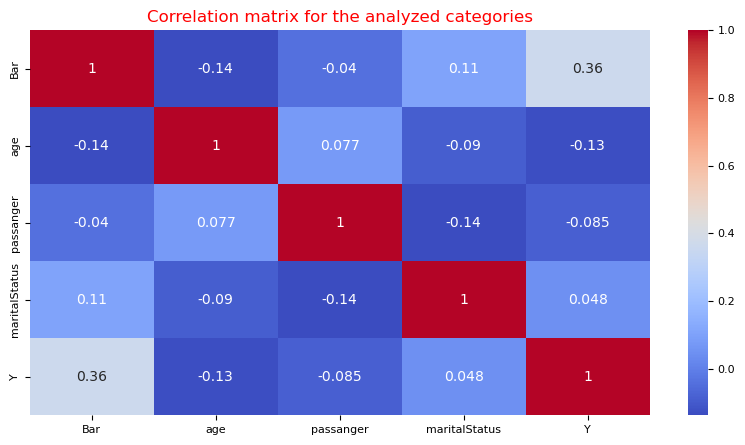

In [287]:
#Further correlation analysis using heatmap - create a new dataframe only with categories under analysis and for cupon with values 'Bar'
df_corr = dfc.query("coupon == 'Bar'")[['Bar','age','passanger','maritalStatus', 'Y']]
df_corr_a = df_corr.corr(numeric_only=True)
plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})
sns.heatmap(df_corr_a, annot=True, cmap='coolwarm');
plt.title("Correlation matrix for the analyzed categories", color = 'Red')

print("------------------------------------------------------------------------------------------------------")
print("Some correlation(0.36) has been detected between 'Bar' values and 'Y' category:")
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
For drivers with more than 1 monthly bar visits, the acceptance rate si much higher than for the ones with less bar monthly visits
------------------------------------------------------------------------------------------------------


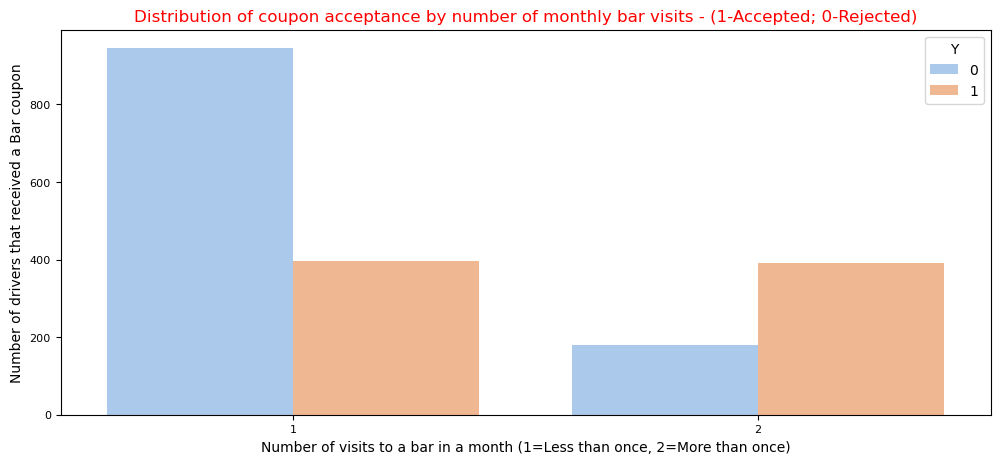

In [300]:
#Create a new dataframe that keeps only 'cupon' category with values Bar
dfcf = dfc.query("coupon == 'Bar'")
plt.xlabel('Number of visits to a bar in a month (1=Less than once, 2=More than once)')
plt.ylabel('Number of drivers that received a Bar coupon')

plt.title("Distribution of coupon acceptance by number of monthly bar visits - (1-Accepted; 0-Rejected)", color = 'Red');
sns.countplot(dfcf, x='Bar', hue = 'Y');

print("------------------------------------------------------------------------------------------------------")
print("For drivers with more than 1 monthly bar visits, the acceptance rate si much higher than for the ones with less bar monthly visits")
print("------------------------------------------------------------------------------------------------------")

**Considering the analysis above and the results, I conclude the following:**

* Drivers that are visiting the bars more than 1 time a month and are over the age of 25 have an acceptance rate close to 70%. There is a strong corelation between number ob monthly visits to the bars and the cupon acceptance rate
* If the drivers are also accompanied by other persons (excluding kids) then the acceptance rate can be slighly improved
* Age is not a relevant factor in cupon acceptance rate
* Income level also shows an inverse correlation with cupon acceptance rate. However, further anylizis are need to confirm the initial finding

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  